# Homework 4
## BUSN 41204 - 2023

- Aman Krishna
- Christian Pavilanis
- Jingwen Li
- Yazmin Ramirez Delgado

In [112]:
# First we import the necessary libraries
import pandas as pd
pd.set_option("display.precision", 4)
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
import plotnine as p9
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4f}'.format
pd.options.mode.chained_assignment = None  # default='warn'
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [113]:
# Let's read the data
train = pd.read_csv('housing_train.csv')
test = pd.read_csv('housing_test.csv')
train.head(2)

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,First_Flr_SF,Low_Qual_Fin_SF,...,Garage_Finish_other,Paved_Drive_other,Pool_QC_other,Fence_No_Fence,Fence_other,Misc_Feature_other,Sale_Type_other,Sale_Condition_other,Gr_Liv_Area,Sale_Price
0,141,31770,1960,1960,112,2,0,441,1656,0,...,0,1,0,1,0,0,0,0,1656,215000
1,80,11622,1961,1961,0,6,144,270,896,0,...,0,0,0,0,0,0,0,0,896,105000


#### 1. Create
- a histogram of SalePrice;
- a histogram of log(Sale_Price);
- a scatterplot between SalePrice and Gr_Liv_Area, the above ground living area square feet;
- a scatterplot between log(Sale_Price) and Gr_Liv_Area. <br>
Comment on what you observe. Which one do you think would be more appropriate as the response of a linear regression model, SalePrice or log(Sale_Price) ?

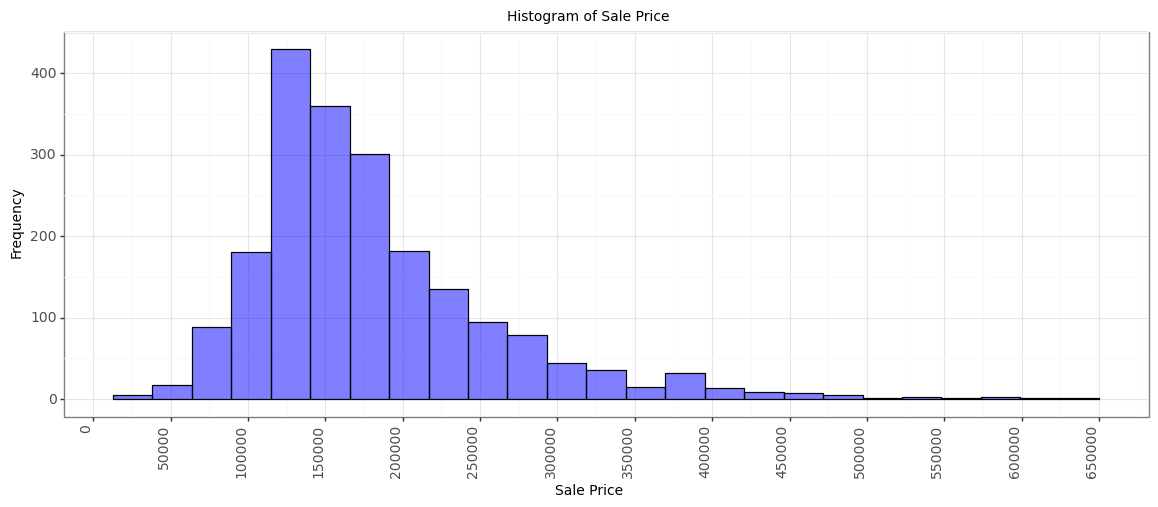

<ggplot: (366839601)>

In [114]:
p1 = p9.ggplot(train, p9.aes(x='Sale_Price')) + p9.geom_histogram(bins=25, fill='blue', color='black', alpha=0.5) + p9.theme_bw() + p9.theme(figure_size=(14, 5),text=p9.element_text(size=10),axis_text_x=p9.element_text(angle=90, hjust=1)) + p9.xlab('Sale Price') + p9.ylab('Frequency') + p9.ggtitle('Histogram of Sale Price')  + p9.scale_x_continuous(breaks=range(0, 800000, 50000))      
p1

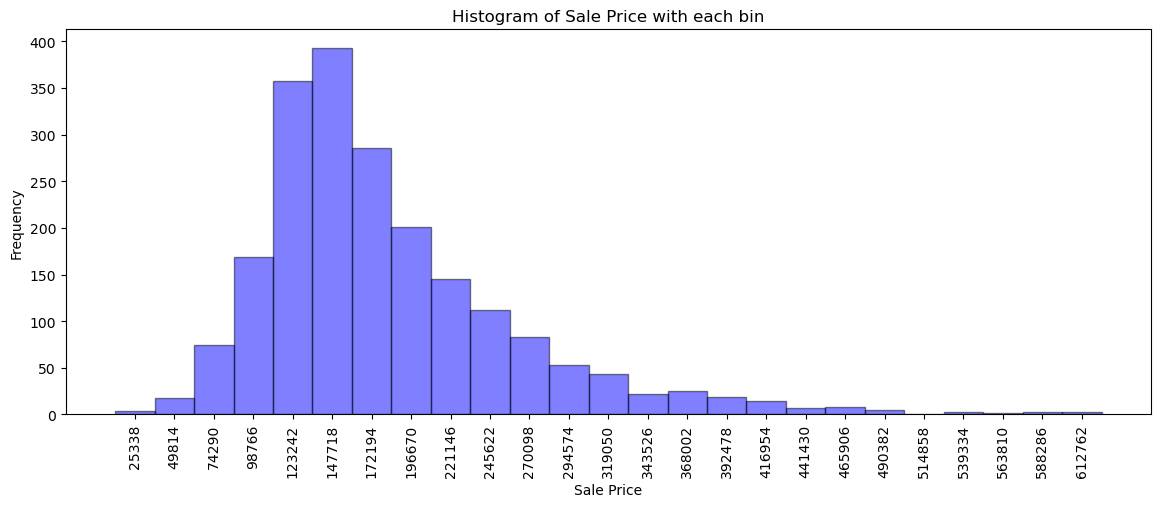

In [115]:
plt.figure(figsize=(14,5))
plt.hist(train['Sale_Price'], bins=25, color='blue', edgecolor='black', alpha=0.5)
bin_range = np.linspace(min(train['Sale_Price']), max(train['Sale_Price']), 26)
bin_mid = (bin_range[1:] + bin_range[:-1])/2
plt.xticks(bin_mid, rotation=90)
plt.title('Histogram of Sale Price with each bin')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

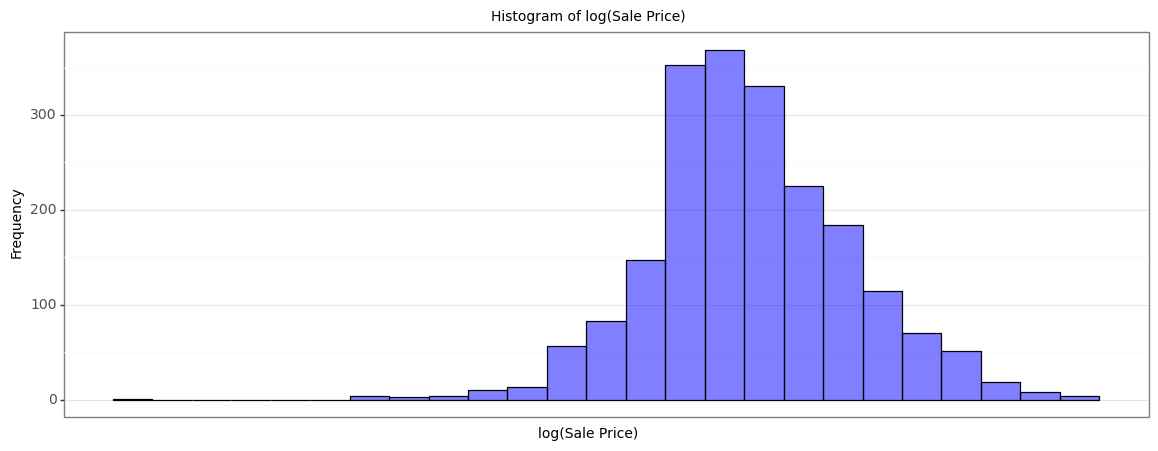

<ggplot: (365428029)>

In [116]:
# calculate log(Sale_Price) and plot the histogram
train['log_Sale_Price'] = np.log(train['Sale_Price'])
p2 = p9.ggplot(train, p9.aes(x='log_Sale_Price')) + p9.geom_histogram(bins=25, fill='blue', color='black', alpha=0.5) + p9.theme_bw() + p9.theme(figure_size=(14, 5),text=p9.element_text(size=10),axis_text_x=p9.element_text(angle=90, hjust=1)) + p9.xlab('log(Sale Price)') + p9.ylab('Frequency') + p9.ggtitle('Histogram of log(Sale Price)')  + p9.scale_x_continuous(breaks=range(0, 800000, 50000))
p2

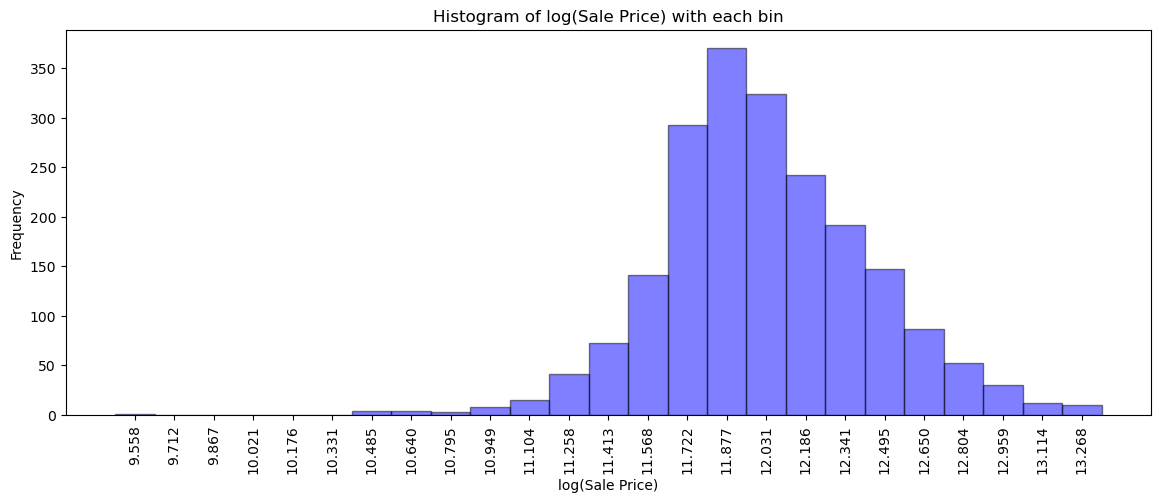

In [117]:
plt.figure(figsize=(14,5))
plt.hist(train['log_Sale_Price'], bins=25, color='blue', edgecolor='black', alpha=0.5)
bin_range = np.linspace(min(train['log_Sale_Price']), max(train['log_Sale_Price']), 26)
bin_mid = (bin_range[1:] + bin_range[:-1])/2
plt.xticks(bin_mid, rotation=90)
plt.title('Histogram of log(Sale Price) with each bin')
plt.xlabel('log(Sale Price)')
plt.ylabel('Frequency')
plt.show()

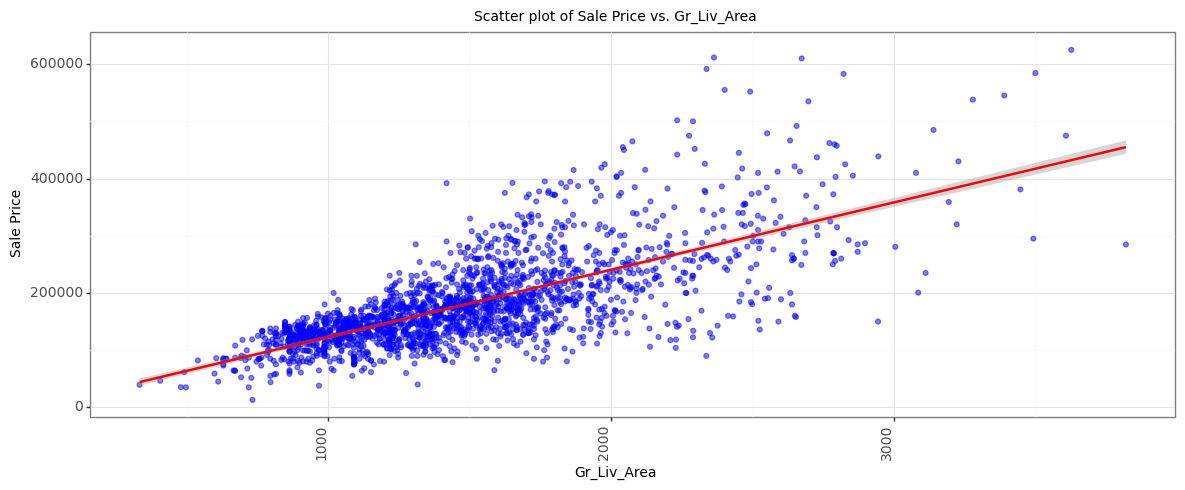

<ggplot: (366897761)>

In [118]:
p3 = p9.ggplot(train, p9.aes(x='Gr_Liv_Area', y='Sale_Price')) + p9.geom_point(color='blue', alpha=0.5) + p9.theme_bw() + p9.theme(figure_size=(14, 5),text=p9.element_text(size=10),axis_text_x=p9.element_text(angle=90, hjust=1)) + p9.xlab('Gr_Liv_Area') + p9.ylab('Sale Price') + p9.ggtitle('Scatter plot of Sale Price vs. Gr_Liv_Area') + p9.geom_smooth(method='lm', se=True, color='red')
p3

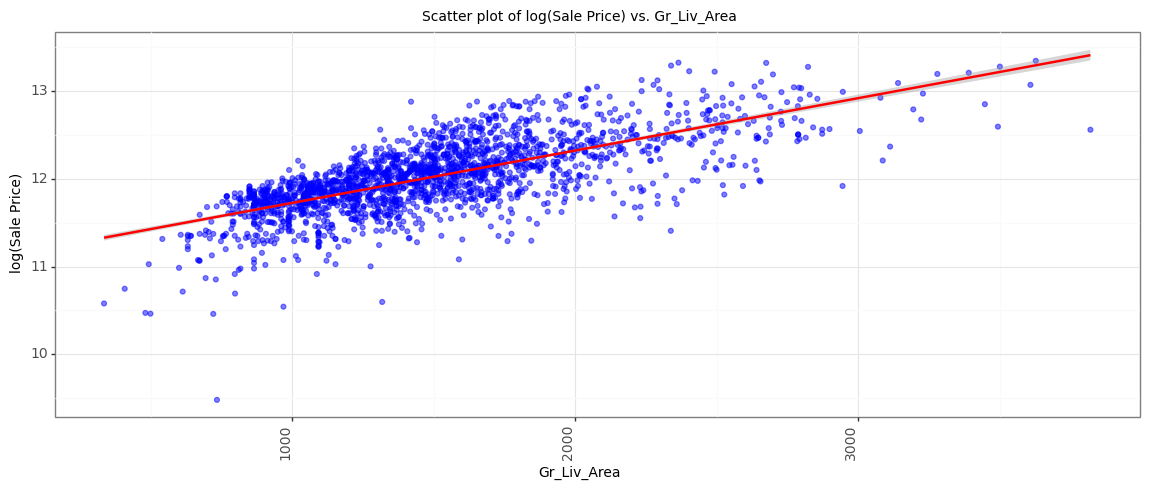

<ggplot: (366901935)>

In [119]:
# create a scatter plot of log(Sale_Price) vs. Gr_Liv_Area and add a regression line with 95% confidence interval
p4 = p9.ggplot(train, p9.aes(x='Gr_Liv_Area', y='log_Sale_Price')) + p9.geom_point(color='blue', alpha=0.5) + p9.theme_bw() + p9.theme(figure_size=(14, 5),text=p9.element_text(size=10),axis_text_x=p9.element_text(angle=90, hjust=1)) + p9.xlab('Gr_Liv_Area') + p9.ylab('log(Sale Price)') + p9.ggtitle('Scatter plot of log(Sale Price) vs. Gr_Liv_Area') + p9.geom_smooth(method='lm', se=True, color='red')
p4

In [120]:
model = ols('log_Sale_Price ~ Gr_Liv_Area', data=train).fit()
printmd('**The MSE error** of the linear regression model between log(Sale_Price) and Gr_Liv_Area on the training set is **{:.4f}**'.format(model.mse_resid))

**The MSE error** of the linear regression model between log(Sale_Price) and Gr_Liv_Area on the training set is **0.0823**

In [121]:
model = ols('Sale_Price ~ Gr_Liv_Area', data=train).fit()
printmd('**The log scaled MSE error** of the linear regression model between Sale_Price and Gr_Liv_Area on the training set is **{:.4f}**'.format(np.log(model.mse_resid)))

**The log scaled MSE error** of the linear regression model between Sale_Price and Gr_Liv_Area on the training set is **21.8642**

With the historgram and scatter plots it is clear that the log of the Sale Price is more normally distributed and has a more linear relationship with the Gr_Liv_Area. This is important because the linear regression model assumes that the response variable is normally distributed and that the relationship between the response and the predictor is linear. Therefore, the log of the Sale Price would be more appropriate as the response of a linear regression model. <br>
Therefore, the log of the Sale Price would be more appropriate as the response of a linear regression model.

#### 2. Fit a linear regression on log(Sale_Price) using forward stepwise selection.
- Create a plot displaying the cross validation score as a function of the number of predictors.
- Create a plot displaying BIC scores as a function of the number of predictors.
- How many variables get selected in the chosen model :
  - by cross validation;
  - by 1-sd rule;
  - by BIC.

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Split the data into independent variables (X) and dependent variable (y)
X = train.iloc[:, :-2].values
y = np.log(train.iloc[:, -1].values)

# Initialize variables for storing the results
selected_features = []
remaining_features = list(range(X.shape[1]))
cv_scores = []
bic_scores = []

# Perform forward selection
while remaining_features:
    scores_with_candidates = []
    for candidate in remaining_features:
        feature_set = selected_features + [candidate]
        X_train = X[:, feature_set]
        
        # Calculate cross-validation score
        reg = LinearRegression()
        cv = np.mean(-cross_val_score(reg, X_train, y, cv=5, scoring="neg_mean_squared_error"))
        scores_with_candidates.append((cv, candidate))
        
        # Calculate BIC score
        k = X_train.shape[1]
        n = X_train.shape[0]
        reg.fit(X_train, y)
        bic = (n * np.log(mean_squared_error(y, reg.predict(X_train))) + k * np.log(n))
        bic_scores.append((bic, candidate))
        
        
    scores_with_candidates.sort()
    best_candidate = scores_with_candidates[0][1]
    selected_features.append(best_candidate)
    remaining_features.remove(best_candidate)
    cv_scores.append(scores_with_candidates[0][0])


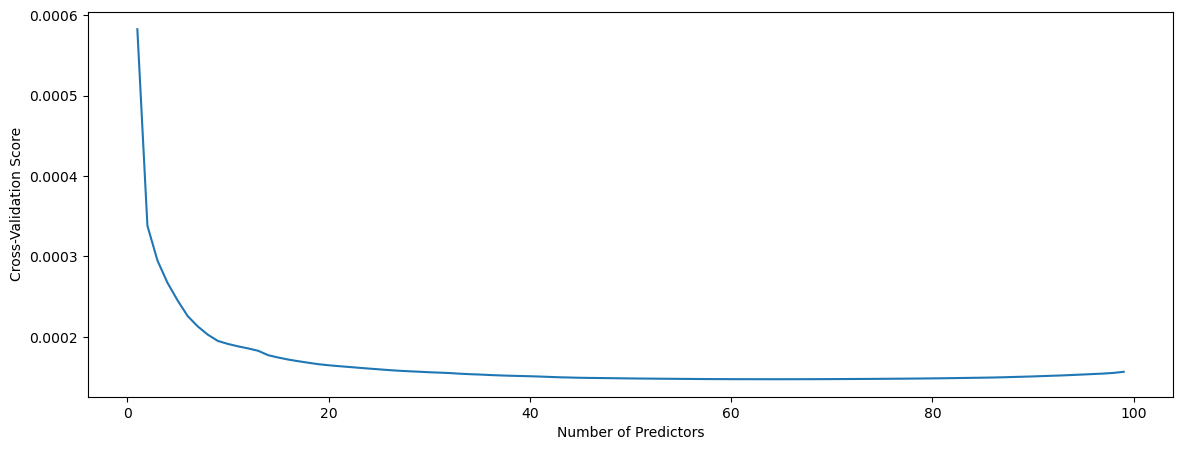

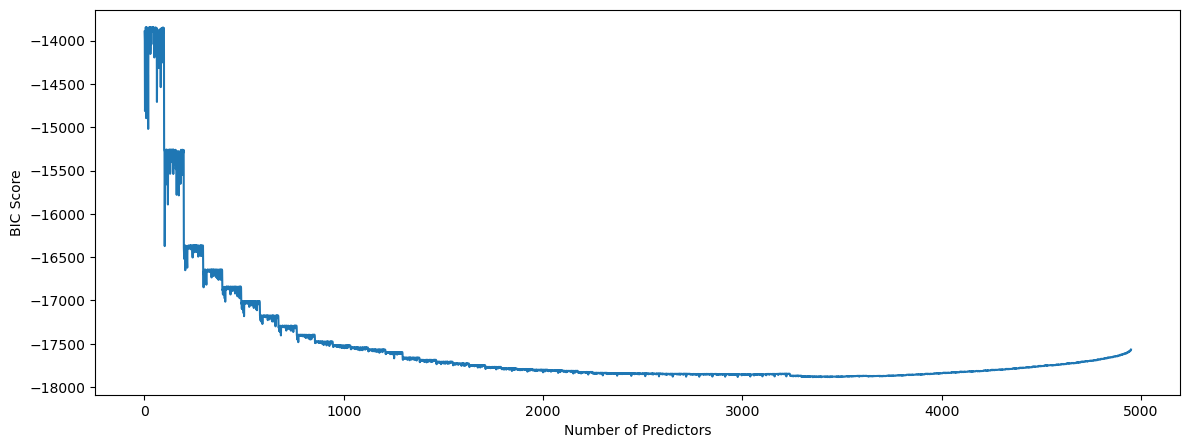

Number of variables selected by cross-validation: 64


In [123]:
    
# Plot cross-validation score vs. number of predictors
plt.figure(figsize=(14,5))
plt.plot(range(1, len(cv_scores) + 1), cv_scores)
plt.xlabel("Number of Predictors")
plt.ylabel("Cross-Validation Score")
plt.show()

# Plot BIC score vs. number of predictors
plt.figure(figsize=(14,5))
plt.plot(range(1, len(bic_scores) + 1), [s[0] for s in bic_scores])
plt.xlabel("Number of Predictors")
plt.ylabel("BIC Score")
plt.show()

# Determine number of variables selected by cross-validation
best_cv_score = min(cv_scores)
best_cv_index = cv_scores.index(best_cv_score)
num_selected_by_cv = best_cv_index + 1
print("Number of variables selected by cross-validation:", num_selected_by_cv)

In [124]:
# Fit the final linear regression model using the selected features
X_train = X[:, selected_features]
reg = LinearRegression()
reg.fit(X_train, y)

# Calculate standard deviation of coefficients
coef_std = np.std(reg.coef_)

# Determine number of variables selected by 1-sd rule
num_selected_by_1sd = sum(abs(reg.coef_) > coef_std)
print("Number of variables selected by 1-sd rule:", num_selected_by_1sd)

Number of variables selected by 1-sd rule: 9


#### 3) Fit a linear regression on log(Sale_Price) using the lasso.
- Create a plot displaying the cross validation score as a function of λ.
- Create a plot displaying the coefficient values as a function of λ.
- How many variables get selected in the chosen model:
  - by cross validation;
  - by 1-sd rule.

In [139]:
from sklearn.linear_model import LassoCV
# Create an instance of LassoCV with cross-validation
reg = LassoCV(cv=5, max_iter=10000)
reg.fit(X, y)

LassoCV(cv=5, max_iter=10000)

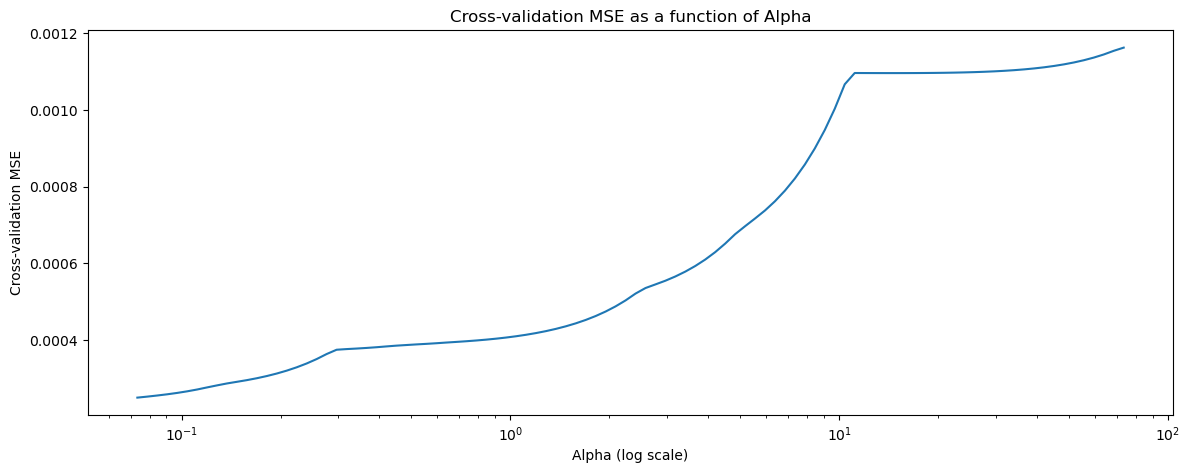

In [140]:
# Plot cross-validation scores as a function of alpha
alphas = reg.alphas_
cv_scores = np.mean(reg.mse_path_, axis=1)
plt.figure(figsize=(14,5))
plt.plot(alphas, cv_scores)
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Cross-validation MSE")
plt.title("Cross-validation MSE as a function of Alpha")
plt.show()

In [141]:
# Determine number of variables selected by cross validation
cv_scores = cross_val_score(reg, X, y, cv=5)
num_selected_by_cv = np.count_nonzero(reg.coef_)
print("Number of variables selected by cross validation:", num_selected_by_cv)

# Determine number of variables selected by 1-sd rule
coef_std = np.std(reg.coef_)
num_selected_by_1sd = np.count_nonzero(abs(reg.coef_) > coef_std)
print("Number of variables selected by 1-sd rule:", num_selected_by_1sd)


Number of variables selected by cross validation: 12
Number of variables selected by 1-sd rule: 3


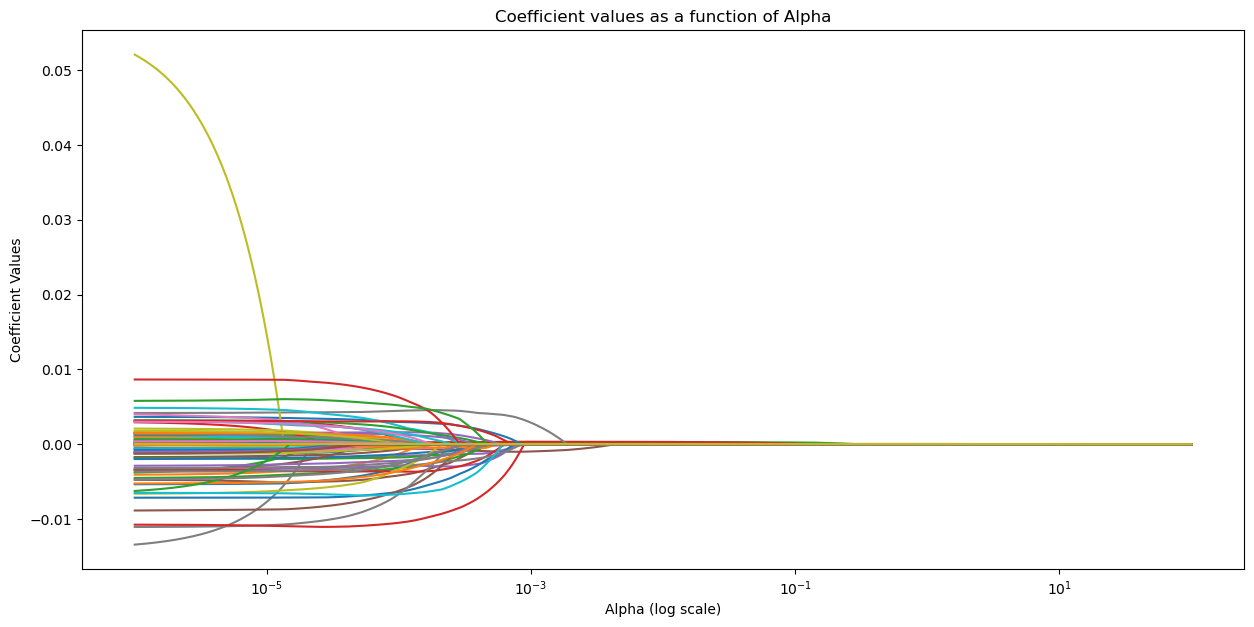

In [137]:
# Plot coefficient values as a function of alpha
alphas = np.logspace(-6, 2, 1000)
coefs = []
from sklearn.linear_model import Lasso
for alpha in alphas:
    reg = Lasso(alpha=alpha, max_iter=10000)
    reg.fit(X, y)
    coefs.append(reg.coef_)

plt.figure(figsize=(15,7))
plt.plot(alphas, coefs)
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coefficient Values")
plt.title("Coefficient values as a function of Alpha")
plt.show()